# Exploraaaaaaaaaaation #

In [1]:
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [2]:
#datapath = 'data/'

## Loading Recipes ##

In [3]:
#filename = 'RAW_recipes.csv'

In [4]:
#df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [5]:
#df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [6]:
#for col in ['nutrition', 'tags', 'ingredients', 'steps']:
#    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [7]:
#df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [8]:
#filename = 'RAW_interactions.csv'

In [9]:
#df_inter = pd.read_csv(datapath + filename)

In [10]:
#df_inter['date'] = df_inter['date'].astype('datetime64')

## Avg rating, n votes and std ##

In [11]:
#data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
#df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [12]:
#df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [13]:
#df_inter_recipe

In [14]:
#df = df_recipes.join(df_inter_recipe)
#df.std_rating = df.std_rating.fillna(0)

In [15]:
#df

In [16]:
#df.describe()

In [17]:
#plot = sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])
#plot.savefig('imgs/pairplot_recipes.png')

In [18]:
#with open('data/recipes.json', 'w') as f:
#    df.to_json(f, date_format='')

In [2]:
df = pd.read_json('data/recipes.json')

In [3]:
df.submitted = df.submitted.astype('datetime64')

## Things we don't want

In [4]:
# Recipes which take more than 5 hours
df = df[df['minutes'] < 300]

## Tag Analysis ##

In [23]:
df['tags'].to_numpy()[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less'])],
      dtype=object)

In [24]:
df.tags

137739    [60-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
44061     [weeknight, time-to-make, course, main-ingredi...
5289      [15-minutes-or-less, time-to-make, course, mai...
25274     [15-minutes-or-less, time-to-make, course, mai...
                                ...                        
357451    [15-minutes-or-less, time-to-make, course, cui...
188810    [60-minutes-or-less, time-to-make, course, mai...
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
Name: tags, Length: 156948, dtype: object

In [25]:
tags = [j for i in df.tags for j in i]

In [26]:
tags_dict = Counter(tags)

In [27]:
tags_dict.most_common(50)

[('preparation', 156536),
 ('time-to-make', 155473),
 ('course', 145054),
 ('main-ingredient', 118171),
 ('dietary', 110524),
 ('easy', 89755),
 ('occasion', 71146),
 ('cuisine', 64027),
 ('low-in-something', 60895),
 ('main-dish', 54364),
 ('60-minutes-or-less', 45526),
 ('vegetables', 43101),
 ('30-minutes-or-less', 42586),
 ('meat', 41465),
 ('15-minutes-or-less', 36761),
 ('3-steps-or-less', 36736),
 ('number-of-servings', 36234),
 ('low-carb', 34551),
 ('north-american', 31020),
 ('taste-mood', 30586),
 ('4-hours-or-less', 29923),
 ('low-calorie', 29889),
 ('healthy', 29765),
 ('equipment', 29578),
 ('low-cholesterol', 29333),
 ('low-sodium', 28768),
 ('vegetarian', 26143),
 ('low-saturated-fat', 25303),
 ('5-ingredients-or-less', 24590),
 ('beginner-cook', 24435),
 ('dinner-party', 23657),
 ('inexpensive', 22752),
 ('low-protein', 22502),
 ('side-dishes', 21891),
 ('healthy-2', 21617),
 ('pasta-rice-and-grains', 21076),
 ('for-1-or-2', 20102),
 ('american', 19290),
 ('poultry', 1

In [28]:
tags_dict.get('north-american')  # Biased towards low quality food

31020

In [29]:
# We will create dummies for these tags. For some of them, we are interested in True values, for others, in False
# healthy and healthy-2 will be combined
custom_tags = ['vegetarian', 'healthy', 'healthy-2', 'italian', 'beginner-cook', 'inexpensive', 'european']

In [30]:
df_tag = df.copy()[['submitted', 'tags', 'n_votes', 'avg_rating', 'std_rating']]

In [31]:
d_tags = df.tags.to_numpy()

for tag in custom_tags:
    dummy = np.array([tag in tags for i, tags in enumerate(d_tags)]).astype(int)
    df_tag[tag] = dummy

In [32]:
df_tag.healthy = df_tag.healthy.combine(df_tag['healthy-2'], func=max)
df_tag = df_tag.drop(columns='healthy-2')

In [33]:
df_tag = df_tag.drop(columns='tags')

In [34]:
df_tag

,submitted,n_votes,avg_rating,std_rating,vegetarian,healthy,italian,beginner-cook,inexpensive,european
137739,2005-09-16,3,5.0,0.0,1,0,0,0,0,0
112140,2005-02-25,1,4.0,0.0,0,0,0,0,0,0
44061,2002-10-25,1,5.0,0.0,1,0,0,0,0,0
5289,1999-12-06,2,5.0,0.0,0,0,0,0,0,0
25274,2002-04-14,1,2.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
357451,2009-02-23,2,5.0,0.0,0,0,0,1,1,0
188810,2006-10-03,1,3.0,0.0,0,1,0,0,0,0
486161,2012-08-29,6,5.0,0.0,0,0,0,0,0,0
493372,2013-01-09,1,5.0,0.0,1,0,0,0,0,0


In [35]:
# Change dates to just represent the month
df_tag.submitted = df_tag.submitted.astype('datetime64[M]')

In [36]:
df_tag = df_tag[(df_tag['vegetarian']== 1)  | (df_tag['italian']== 1)  | (df_tag['healthy']== 1)  | (df_tag['beginner-cook'] == 1)  | (df_tag['inexpensive'] == 1)  | (df_tag['european']== 1)]

In [37]:
tags = ['vegetarian', 'italian',  'healthy', 'beginner-cook', 'inexpensive', 'european']

data = {tag: df_tag[df_tag[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data.items():
    data[k] = v.sort_index()

In [38]:
def sumseries(x, y):
    if np.isnan(x):
        return y
    elif np.isnan(y):
        return x
    else:
        return x+y

In [39]:
total = data['vegetarian']
for i, ele in enumerate(data):
    if i > 0:
        total = total.combine(data[ele], func=sumseries)

In [40]:
for tag, dic in data.items():
    data[tag] = pd.Series({k:v/total[k] for k, v in data[tag].items()})

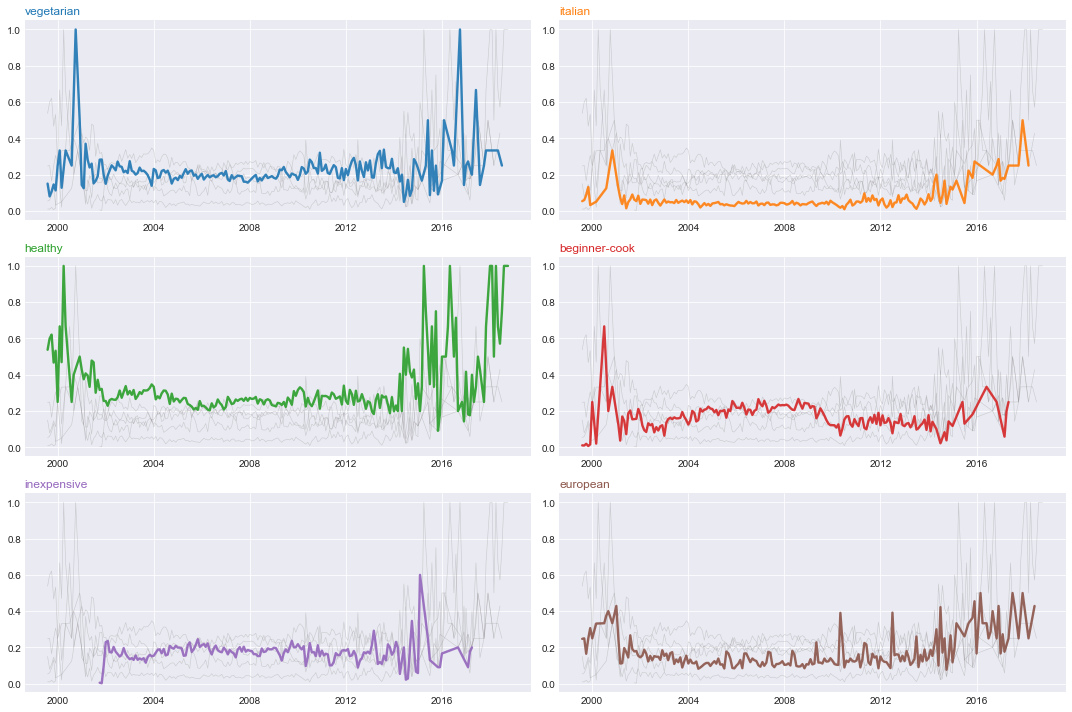

In [41]:
plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 2.4, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
#fig.savefig('imgs/tags.png')
plt.show()


### Tags Yearly ###

In [42]:
df_tag2 = df_tag.copy()
df_tag2.submitted = df_tag2.submitted.astype('datetime64[Y]')

In [43]:
data2 = {tag: df_tag2[df_tag2[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data2.items():
    data2[k] = v.sort_index()

In [44]:
#total = data2['vegetarian']
#for i, ele in enumerate(data2):
#    if i > 0:
#        total = total.combine(data2[ele], func=sumseries)

In [45]:
# Get number of monthly recipes
df_year = df.copy()
df_year.submitted = df_year.submitted.astype('datetime64[Y]')

In [46]:
total_dict = {k: v.shape[0] for k, v in df_year.groupby('submitted')}
total = pd.Series(total_dict)

In [47]:
data2

{'vegetarian': 1999-01-01      60
 2000-01-01      32
 2001-01-01     470
 2002-01-01    2122
 2003-01-01    1638
 2004-01-01    1492
 2005-01-01    2934
 2006-01-01    3401
 2007-01-01    3739
 2008-01-01    3338
 2009-01-01    2857
 2010-01-01    1615
 2011-01-01    1050
 2012-01-01     679
 2013-01-01     579
 2014-01-01      98
 2015-01-01      14
 2016-01-01       7
 2017-01-01      16
 2018-01-01       2
 Name: submitted, dtype: int64, 'italian': 1999-01-01     40
 2000-01-01     12
 2001-01-01    136
 2002-01-01    476
 2003-01-01    396
 2004-01-01    297
 2005-01-01    529
 2006-01-01    772
 2007-01-01    785
 2008-01-01    728
 2009-01-01    591
 2010-01-01    228
 2011-01-01    313
 2012-01-01    134
 2013-01-01     99
 2014-01-01     44
 2015-01-01     11
 2016-01-01      4
 2017-01-01     10
 2018-01-01      1
 Name: submitted, dtype: int64, 'healthy': 1999-01-01     271
 2000-01-01     103
 2001-01-01     675
 2002-01-01    2580
 2003-01-01    2330
 2004-01-01    2119
 2

In [48]:
for tag, dic in data2.items():
    data2[tag] = pd.Series({k:v/total[k] for k, v in data2[tag].items()})

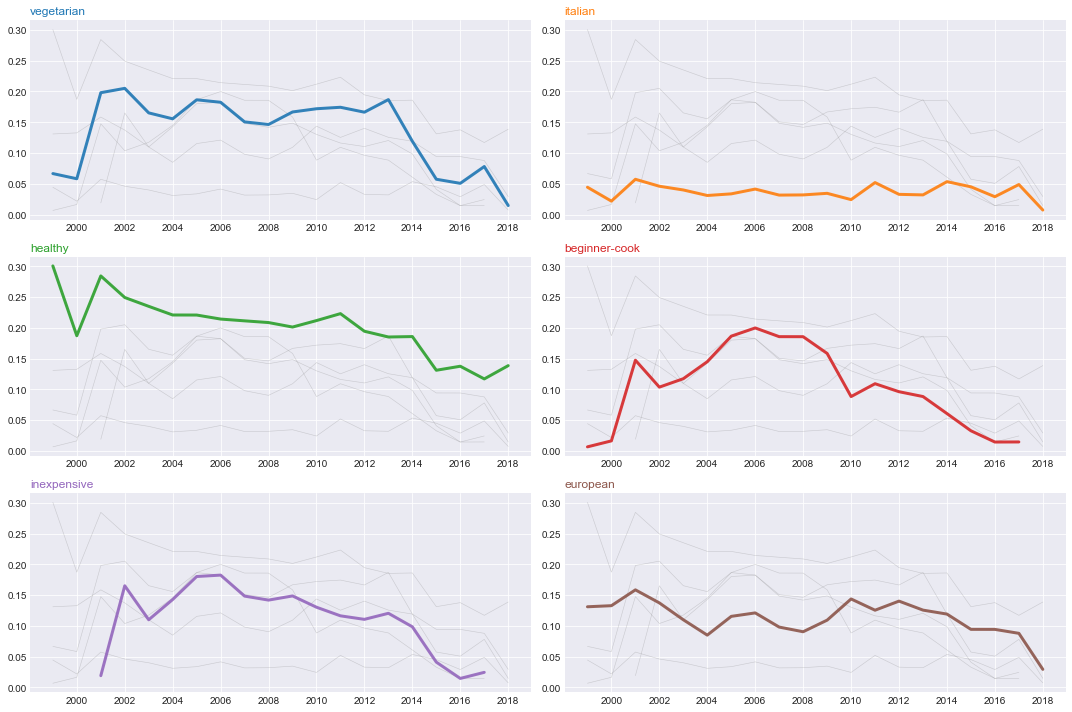

In [49]:
plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data2):
    j = i // 2
    k = i % 2
    for entry in data2.keys():
        ax[j][k].plot(data2[entry].index, data2[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data2[ele].index, data2[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))


fig.tight_layout()
fig.savefig('imgs/tags_yearly.png')
plt.show()


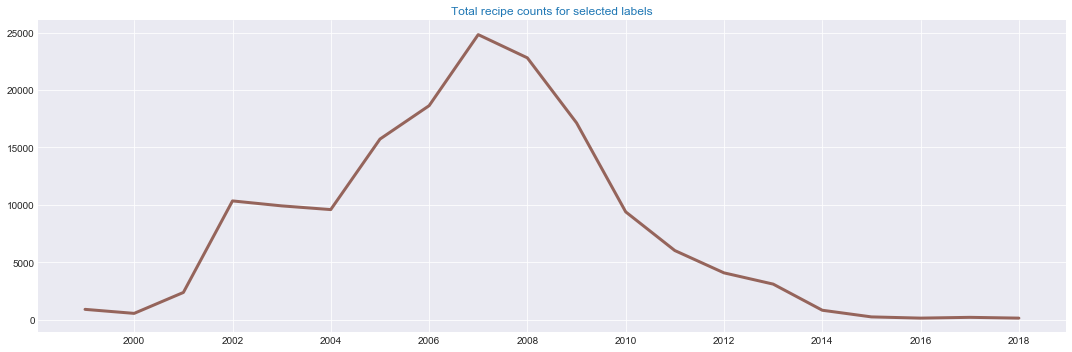

In [50]:
# Plotting yearly total

plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(total.index, total.to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9)
ax.set_title('Total recipe counts for selected labels', fontsize=12, fontweight=0, color='C0')

fig.tight_layout()
fig.savefig('imgs/tags_yearly_total.png')
plt.show()

## Ingredients (vegetarian and healthy)##

In [51]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_ing = df.loc[index]
df_ing

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_votes,avg_rating,std_rating
54272,fool the meat eaters chili,40,40525,2003-02-17,"[60-minutes-or-less, time-to-make, course, mai...","[295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]",9,"[rehydrate tvp if needed, spray or oil a large...",this recipe was adapted by my mother and mysel...,"[vegetarian ground beef, garlic, onion, jalape...",12,4,4.500000,1.000000
95926,say what banana sandwich,5,118163,2004-07-20,"[15-minutes-or-less, time-to-make, course, mai...","[238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]",4,[spread a tablespoon on one side of each slice...,you just have to try it to believe it.,"[white bread, mayonnaise, bananas]",3,43,4.139535,1.740025
112959,sour cream avocado dip vegan,10,167849,2005-03-08,"[lactose, 15-minutes-or-less, time-to-make, co...","[12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",6,"[peel and pit avocado , put in a large mixing ...",i made this up when i had an avocado that was ...,"[soft silken tofu, avocado, chunky salsa, fres...",7,4,3.750000,2.500000
63793,tide me over indian chaat simple veggie salad,2,12657,2003-06-05,"[15-minutes-or-less, time-to-make, course, mai...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"[toss everything well in a serving bowl, grab ...",this version of the famous indian chaat (prono...,"[cucumber, potato, chopped tomato, plain yogur...",7,7,4.428571,0.786796
70099,1 asian noodle salad,26,75379,2003-09-02,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 7.0, 21.0, 32.0, 8.0, 3.0, 14.0]",7,"[bring a large pot of water to boil, add rice ...",i am addicted to this! and it's so easy to mak...,"[rice noodles, carrot, english cucumber, green...",13,5,4.200000,0.836660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202637,zucchini feta mash,15,40114,2006-12-30,"[15-minutes-or-less, time-to-make, course, mai...","[190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]",8,"[juice the lemon, grate the zucchini coarsely,...",a nice and healthy alternative for mashed pota...,"[lemon, zucchini, olive oil, salt, pepper, fet...",7,1,2.000000,0.000000
66897,zucchini onion salad,18,92725,2003-07-16,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]",10,"[grate zucchini, dice onion, over medium heat ...","i wrinkled my nose at this in the beginning, t...","[onion, sour cream, butter, fresh ground peppe...",7,3,4.000000,1.732051
96811,zucotte,65,65056,2004-08-03,"[time-to-make, course, main-ingredient, prepar...","[145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]",10,"[in a large , heavy saucpan , melt 1 tbs of th...",a garlicky braised winter squash dish that cou...,"[butter, white wine, garlic, butternut squash,...",6,12,4.916667,0.288675
89330,zuppa sarda sardinian cheese and egg soup wit...,30,94272,2004-04-18,"[30-minutes-or-less, time-to-make, course, mai...","[733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]",10,"[preheat oven to 350 degrees f, brush bread sl...","so easy, this cheesy italian comfort food is d...","[french bread, olive oil, garlic, low sodium v...",9,1,5.000000,0.000000


In [52]:
ingredients = [j for i in df_ing.ingredients for j in i]

In [53]:
ingredients_dict = Counter(ingredients)

In [54]:
ingredients_dict.most_common(50)

[('salt', 2386),
 ('olive oil', 1513),
 ('water', 1152),
 ('onion', 1134),
 ('garlic cloves', 964),
 ('butter', 834),
 ('sugar', 786),
 ('tomatoes', 561),
 ('pepper', 558),
 ('salt and pepper', 547),
 ('garlic', 494),
 ('eggs', 457),
 ('garlic clove', 435),
 ('black pepper', 428),
 ('lemon juice', 421),
 ('parmesan cheese', 393),
 ('vegetable oil', 391),
 ('milk', 372),
 ('extra virgin olive oil', 331),
 ('oil', 329),
 ('ground cumin', 323),
 ('carrots', 305),
 ('flour', 303),
 ('carrot', 298),
 ('garlic powder', 298),
 ('onions', 284),
 ('potatoes', 272),
 ('fresh parsley', 272),
 ('chili powder', 269),
 ('zucchini', 260),
 ('red onion', 259),
 ('honey', 255),
 ('cumin', 253),
 ('celery', 246),
 ('cinnamon', 235),
 ('brown sugar', 234),
 ('egg', 233),
 ('fresh ground black pepper', 221),
 ('baking powder', 212),
 ('fresh cilantro', 211),
 ('cayenne pepper', 210),
 ('parsley', 210),
 ('black beans', 209),
 ('soy sauce', 205),
 ('paprika', 203),
 ('chickpeas', 194),
 ('sour cream', 188)

In [55]:
# We will use not = to filter, but contains, so that garlic cloves and garlic clove are grouped, and so on...
ing_custom = ['onion', 'garlic', 'tomato', 'cheese', 'egg', 'carrot']

In [56]:
d_ings = df_ing.ingredients.to_numpy()

for ing in ing_custom:
    dummy = np.array([np.array([ing in ingr for ingr in ings]).any() for ings in d_ings]).astype(int)
    df_ing[ing] = dummy

In [57]:
df_ing.submitted = df_ing.submitted.astype('datetime64[Y]')

In [58]:
data = {ing: df_ing[df_ing[ing] == 1].submitted.value_counts() for ing in ing_custom}
for k,v in data.items():
    data[k] = v.sort_index()

In [59]:
for ing, dic in data.items():
    data[ing] = pd.Series({k:v/total[k] for k, v in data[ing].items()})

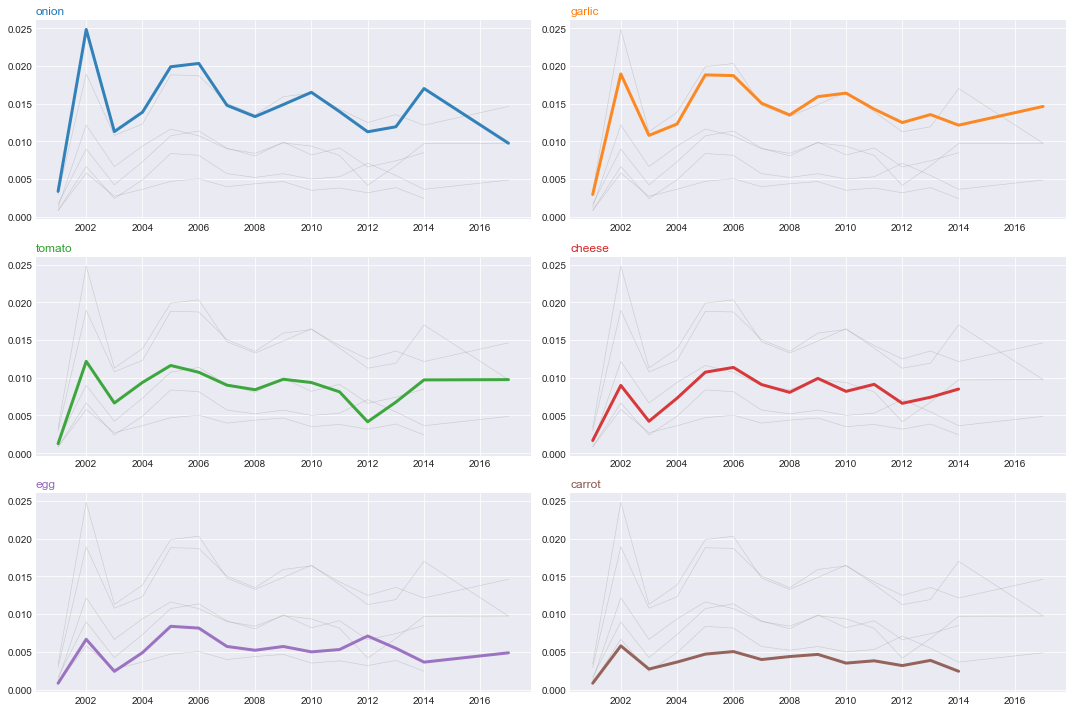

In [60]:
plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy(), marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy(), marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=12, fontweight=0, color='C{}'.format(i))

fig.tight_layout()
fig.savefig('imgs/ing_yearly.png')
plt.show()


In [61]:
for i in df_ing.ingredients:
    print(i)
df_ing

['vegetarian ground beef', 'garlic', 'onion', 'jalapenos', 'green pepper', 'celery', 'kidney beans', 'diced tomatoes', 'chili powder', 'black pepper', 'salt', 'red pepper flakes']
['white bread', 'mayonnaise', 'bananas']
['soft silken tofu', 'avocado', 'chunky salsa', 'fresh cilantro', 'lime juice', 'hot sauce', 'salt and pepper']
['cucumber', 'potato', 'chopped tomato', 'plain yogurt', 'chat masala', 'paprika', 'salt']
['rice noodles', 'carrot', 'english cucumber', 'green onions', 'bean sprouts', 'garlic', 'fresh ginger', 'light soy sauce', 'sesame oil', 'rice wine vinegar', 'honey', 'asian chili sauce', 'fresh cilantro']
['spaghetti squash', 'asparagus', 'white mushroom', 'red bell pepper', 'garlic cloves', 'spaghetti sauce', 'italian seasoning', 'part-skim mozzarella cheese', 'reduced-fat parmesan cheese', 'salt and pepper']
['water', 'white rice', 'tea bag', 'seasoning salt', 'black pepper', 'dried basil', 'chili powder', 'garlic powder', 'cayenne pepper', 'soy sauce', 'lemon juice

['rolls', 'greens', 'gouda cheese', 'tomatoes', 'cucumbers', 'hard-boiled egg', 'mixed sprouts']
['water', 'vegetable bouillon cubes', 'creme fraiche', 'coarse grain mustard', 'soft cheese', 'cornstarch', 'salt and pepper', 'spring onion']
['sesame oil', 'steak', 'water', 'red chili paste', 'soybean paste', 'hot red pepper flakes', 'fresh garlic cloves', 'potato', 'yellow squash', 'carrots', 'onion', 'green onions', 'chilies', 'extra firm tofu']
['salt', 'garlic powder', 'pepper', 'oregano', 'paprika', 'celery seed', 'onion powder', 'dry mustard', 'cornstarch']
['macaroni', 'butter', 'velveeta cheese', 'milk']
['salsa', 'sour cream']
['vegetable oil', 'chili powder', 'cumin', 'flour', 'water', 'vinegar']
['green lentils', 'water', 'garlic cloves', 'diced tomatoes with juice', 'tiny pasta', 'dried parsley', 'thyme', 'rosemary', 'basil', 'salt', 'pepper']
['extra virgin olive oil', 'onions', 'garlic cloves', 'diced tomatoes', 'salt and pepper', 'basil', 'rotini pasta', 'parmesan cheese']

['water', 'quinoa', 'onion', 'olive oil', 'fat-free vegetable broth', 'frozen peas', 'salt', 'pepper', 'plain fat-free yogurt']
['nonfat sour cream', 'skim milk', 'apple juice concentrate', 'sugar substitute', 'poppy seeds']
['low-fat mayonnaise', 'low-fat sour cream', 'nonfat yogurt', 'onion powder', 'garlic powder', 'chives', 'lemon, zest of', 'dried dill', 'dried herbs', 'low-sodium instant chicken bouillon granules', 'lemon juice', 'fat-free buttermilk']
['red potatoes', 'extra virgin olive oil', 'salt', 'pepper', 'parsley']
['red potatoes', 'parmesan cheese', 'onion', 'fat-free italian salad dressing', 'fresh ground pepper', 'salt', 'cooking spray']
['tiny new potatoes', 'frozen spinach', 'fat-free mayonnaise', 'low-fat greek yogurt', 'dried onion flakes', 'vegetable stock powder', 'dried parsley', 'dried chives', 'salt & freshly ground black pepper']
['yeast', 'water', 'whole wheat flour', 'sugar', 'salt']
['lemon, juice of', 'wine vinegar', 'garlic clove', 'dry mustard', 'dried 

['leeks', 'vegetable oil', 'salt', 'pepper']
['lemon juice', 'soy sauce', 'sugar', 'olive oil', 'butter', 'garlic paste', 'mushrooms']
['olive oil', 'butter', 'zucchini', 'salt', 'pepper', 'flour', 'soy sauce', 'lemon juice']
['olive oil', 'garlic cloves', 'spinach', 'salt and pepper']
['butter', 'garlic', 'fresh mushrooms', 'lemon juice', 'salt', 'fresh ground black pepper']
['baby potatoes', 'butter', 'fresh parsley', 'lemon peel', 'fresh lemon juice', 'salt and black pepper']
['grape tomatoes', 'extra virgin olive oil', 'garlic clove', 'kosher salt', 'arugula', 'fresh ground black pepper', 'balsamic vinegar']
['fresh bean sprouts', 'onion', 'vegetable oil', 'salt']
['broccoli rabe', 'garlic cloves', 'shallot', 'olive oil', 'salt', 'water']
['sweet corn', 'green onion', 'olive oil', 'butter', 'salt and pepper']
['radishes', 'butter', 'salt']
['olive oil', 'butter', 'summer squash', 'salt', 'sugar', 'fresh ground pepper']
['olive oil', 'onion', 'zucchini', 'garlic cloves', 'fresh pars

['zucchini', 'egg substitute', 'onion', 'dry breadcrumbs', 'salt', 'garlic powder']
['zucchini', 'summer squash', 'onion', 'tomatoes', 'oil', 'rice', 'water', 'garlic salt']
['zucchini', 'salt', 'olive oil', 'onion', 'button mushrooms', 'crushed tomatoes', 'garlic powder', 'cumin']
['zucchini', 'pumpkin seeds', 'flour', 'baking powder', 'egg', 'egg yolk', 'white wine', 'tomatoes', 'salt', 'pepper', 'fresh basil', 'onion', 'garlic clove', 'olive oil']
['zucchini', 'potatoes', 'onions', 'fresh garlic', 'italian parsley', 'plum tomato', 'eggs', 'parmesan cheese', 'salt', 'black pepper', 'red pepper flakes', 'dried basil', 'olive oil', 'tomato paste', 'garlic powder', 'onion powder', 'dried oregano']
['zucchini', 'mushroom', 'green pepper', 'onion', 'olive oil', 'garlic', 'salt and pepper', 'fresh parsley', 'tomato sauce']
['zucchini', 'italian seasoned breadcrumbs', 'onion', 'green pepper', 'old bay seasoning', 'miracle whip', 'oil']
['zucchini', 'olive oil', 'salt', 'pepper']
['linguine'

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_votes,avg_rating,std_rating,onion,garlic,tomato,cheese,egg,carrot
54272,fool the meat eaters chili,40,40525,2003-01-01,"[60-minutes-or-less, time-to-make, course, mai...","[295.6, 3.0, 56.0, 76.0, 32.0, 1.0, 18.0]",9,"[rehydrate tvp if needed, spray or oil a large...",this recipe was adapted by my mother and mysel...,"[vegetarian ground beef, garlic, onion, jalape...",12,4,4.500000,1.000000,1,1,1,0,0,0
95926,say what banana sandwich,5,118163,2004-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[238.0, 3.0, 66.0, 10.0, 10.0, 2.0, 17.0]",4,[spread a tablespoon on one side of each slice...,you just have to try it to believe it.,"[white bread, mayonnaise, bananas]",3,43,4.139535,1.740025,0,0,0,0,0,0
112959,sour cream avocado dip vegan,10,167849,2005-01-01,"[lactose, 15-minutes-or-less, time-to-make, co...","[12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",6,"[peel and pit avocado , put in a large mixing ...",i made this up when i had an avocado that was ...,"[soft silken tofu, avocado, chunky salsa, fres...",7,4,3.750000,2.500000,0,0,0,0,0,0
63793,tide me over indian chaat simple veggie salad,2,12657,2003-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"[toss everything well in a serving bowl, grab ...",this version of the famous indian chaat (prono...,"[cucumber, potato, chopped tomato, plain yogur...",7,7,4.428571,0.786796,0,0,1,0,0,0
70099,1 asian noodle salad,26,75379,2003-01-01,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 7.0, 21.0, 32.0, 8.0, 3.0, 14.0]",7,"[bring a large pot of water to boil, add rice ...",i am addicted to this! and it's so easy to mak...,"[rice noodles, carrot, english cucumber, green...",13,5,4.200000,0.836660,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202637,zucchini feta mash,15,40114,2006-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[190.2, 22.0, 19.0, 17.0, 15.0, 31.0, 3.0]",8,"[juice the lemon, grate the zucchini coarsely,...",a nice and healthy alternative for mashed pota...,"[lemon, zucchini, olive oil, salt, pepper, fet...",7,1,2.000000,0.000000,0,0,0,1,0,0
66897,zucchini onion salad,18,92725,2003-01-01,"[30-minutes-or-less, time-to-make, course, mai...","[231.1, 28.0, 27.0, 8.0, 8.0, 56.0, 5.0]",10,"[grate zucchini, dice onion, over medium heat ...","i wrinkled my nose at this in the beginning, t...","[onion, sour cream, butter, fresh ground peppe...",7,3,4.000000,1.732051,1,0,0,0,0,0
96811,zucotte,65,65056,2004-01-01,"[time-to-make, course, main-ingredient, prepar...","[145.7, 13.0, 10.0, 2.0, 3.0, 27.0, 5.0]",10,"[in a large , heavy saucpan , melt 1 tbs of th...",a garlicky braised winter squash dish that cou...,"[butter, white wine, garlic, butternut squash,...",6,12,4.916667,0.288675,0,1,0,0,0,0
89330,zuppa sarda sardinian cheese and egg soup wit...,30,94272,2004-01-01,"[30-minutes-or-less, time-to-make, course, mai...","[733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]",10,"[preheat oven to 350 degrees f, brush bread sl...","so easy, this cheesy italian comfort food is d...","[french bread, olive oil, garlic, low sodium v...",9,1,5.000000,0.000000,0,1,0,1,1,0


# Ingredients controversy

In [62]:
st_ing = {k:df_ing[df_ing[k]==1]['std_rating'].mean() for k in ing_custom }
rating_ing = {k:df_ing[df_ing[k]==1]['avg_rating'].mean() for k in ing_custom }
n_ing = {k:df_ing[df_ing[k]==1]['n_votes'].mean() for k in ing_custom }

In [63]:
df.shape

(156948, 14)

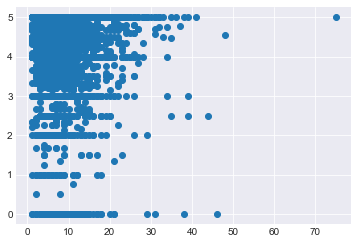

In [64]:
plt.scatter(df_ing['n_steps'], df_ing['avg_rating'])

In [65]:
dlen = []
for i in df['description']:
    if i:
        dlen.append(len(i.split(' ')))
    else:
        dlen.append(0)
df['dlen'] = dlen

In [66]:
dname = []
for i in df['name']:
    if i:
        dname.append(len(i.split(' ')))
    else:
        dname.append(0)
df['dname'] = dname

In [67]:
print('nIngredients:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_ingredients'].median())
print('Minutes:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['minutes'].median())
print('nSteps:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_steps'].median())
print('Desc length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dlen'].median())
print('Name length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dname'].median())

nIngredients: 8.0
Minutes: 30.0
nSteps: 8.0
Desc length: 35.0
Name length: 5.0


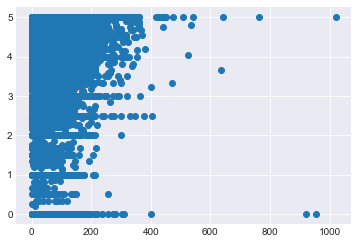

In [68]:
plt.scatter(df['dlen'], df['avg_rating'])

In [69]:
#plt.scatter(df_ing['dlen'], df_ing['avg_rating'])

# Overall name for healthy + vegetarian

In [94]:
irr = ['s', 'with', 'and', 'the', 'for']

In [110]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

def generate_wordcloud(series: pd.Series, irrelevant_words: list, bg='white') -> Counter:
    """Plot wordcloud given series of text.
    
    :param series: the pd.Series of text
    :param irrelevant_words: list of words to exclude
    :param bg: the background color for the cloud
    :return: a collections.Counter of every word
    """
    lucastemmer = PorterStemmer()
    text = [lucastemmer.stem(term) for term in word_tokenize(series.str.cat(sep=' '))]
    lo = Counter(text)
    irr = ['s', 'with', 'and']
    lo = {k:v for k,v in lo.items() if k not in irrelevant_words}
    
    # Plot
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color = bg, 
                stopwords = [' ', '  '], 
                min_font_size = 10).generate_from_frequencies(lo) 

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
    
    return lo

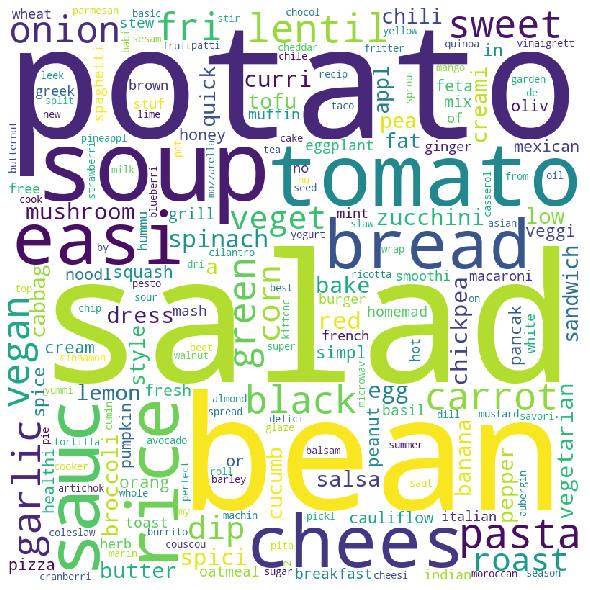

In [111]:
lo = generate_wordcloud(df_ing.name, irr)

# Keywords to be loved? vegetarian + healthy

In [112]:
df_ing[['n_votes', 'avg_rating', 'std_rating']].describe()

,n_votes,avg_rating,std_rating
count,6157.000000,6157.000000,6157.000000
mean,5.283255,4.322782,0.515474
std,12.711460,0.976681,0.782877
min,1.000000,0.000000,0.000000
25%,1.000000,4.000000,0.000000
50%,2.000000,4.666667,0.000000
75%,5.000000,5.000000,0.707107
max,344.000000,5.000000,3.535534


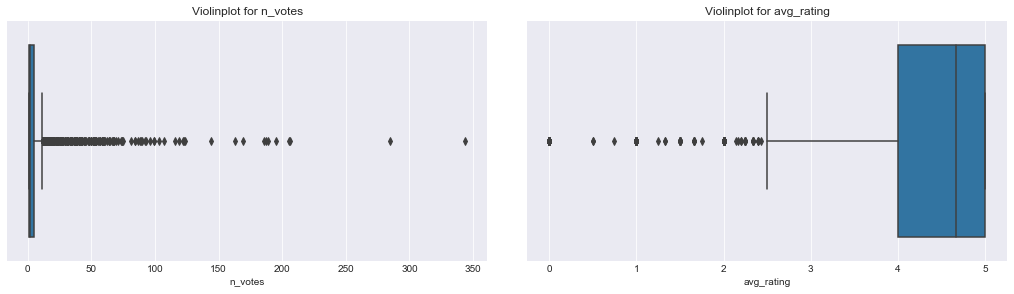

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# N_votes
sns.boxplot(df_ing.n_votes, ax=ax[0])
ax[0].set_title('Violinplot for n_votes')

# Avg_rating
sns.boxplot(df_ing.avg_rating, ax=ax[1])
ax[1].set_title('Violinplot for avg_rating')

fig.tight_layout(pad=4)

fig.savefig('imgs/votes_rating_veghealth.png')

plt.show()

In [114]:
df_ing[df_ing.avg_rating <= 4].shape[0], df_ing[df_ing.avg_rating == 5].shape[0]

(1887, 2377)

In [115]:
df_ing[df_ing.n_votes <= 1].shape[0], df_ing[df_ing.n_votes >= 5].shape[0]

(2204, 1644)

# Popularity (n_votes)

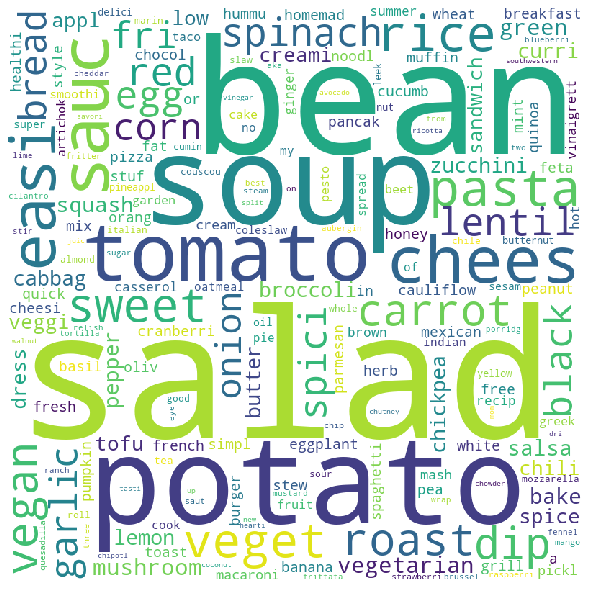

In [116]:
low_size = df_ing[df_ing.n_votes <= 1].shape[0]
lo_low = generate_wordcloud(df_ing[df_ing.n_votes <= 1].name, irr)

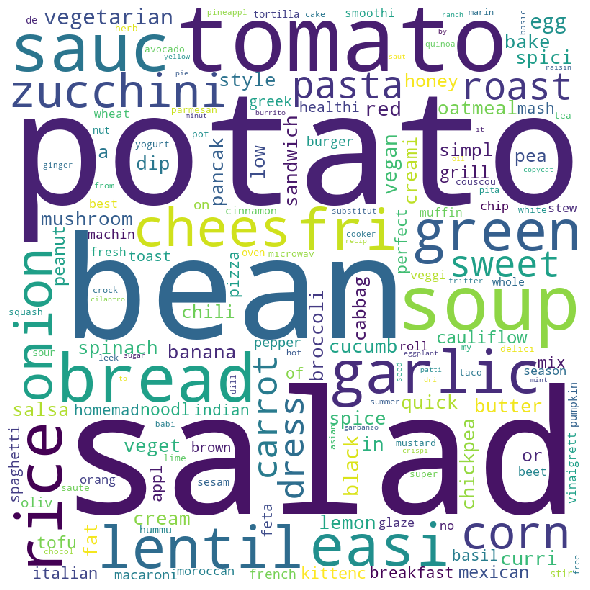

In [117]:
high_size = df_ing[df_ing.n_votes >= 5].shape[0]
lo_high = generate_wordcloud(df_ing[df_ing.n_votes >= 5].name, irr)

In [118]:
set(list(lo_low.keys()) + list(lo_high.keys()))

{'houmou',
 'beaten',
 'devilishli',
 'wedg',
 'tuna',
 'gun',
 'cassi',
 'mein',
 'tea',
 'sumac',
 'cumin',
 'refrito',
 'broodj',
 'moosewood',
 'ever',
 'saltado',
 'mologut',
 'kalamata',
 'sandwich',
 'omelet',
 'giardiniera',
 'mayonnais',
 'bishop',
 'anytim',
 'hommu',
 'pol',
 'drew',
 'peasant',
 'claw',
 'papa',
 'pig',
 'fettuccini',
 'cola',
 'jelli',
 'sot',
 'among',
 'chapati',
 'mudamm',
 'tropic',
 'homini',
 'marocain',
 'pita',
 'aluminium',
 'pleas',
 'couscou',
 'tzatziki',
 'coconut',
 'hungri',
 'that',
 'pimenton',
 'yachni',
 'parti',
 'anoth',
 'slice',
 'sarda',
 'ragot',
 'hasselback',
 'creol',
 'triangl',
 'go',
 'morrocan',
 'believ',
 'veganis',
 'yuca',
 'hard',
 'parmigiano',
 'seed',
 'guacamol',
 'bulghur',
 'poach',
 'todd',
 'refriger',
 'burn',
 'ovaltin',
 'havarti',
 'benefici',
 'ensalada',
 'color',
 'mom',
 '100',
 'popper',
 'zuppa',
 'fri',
 'ball',
 'tvp',
 '101',
 '1927',
 'rememb',
 'grown',
 'dip',
 'milk',
 'fattoush',
 'wand',
 'kol

In [119]:
# Difference between average in high and average in low
lo_diff = {k: lo_high.get(k, 0)/high_size - lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [120]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [121]:
lo_diff

{'veget': -0.016089966925872445,
 'squash': -0.0128189842842697,
 'eggplant': -0.010106596720848182,
 'pasta': -0.009224546389886117,
 'pepper': -0.009169349247773349,
 'soup': -0.008726668168028931,
 'chees': -0.008142682404475826,
 'dip': -0.007758510295370946,
 'spici': -0.007314725272784275,
 'stuf': -0.0070851051615951535,
 'spinach': -0.006851069279037007,
 'veggi': -0.0067561301946030446,
 'casserol': -0.0064967036266730255,
 'cranberri': -0.0064867681410927264,
 'cheesi': -0.005579327124758789,
 'mint': -0.0055693916391784904,
 'vegan': -0.005170868273124289,
 'fennel': -0.004537205081669692,
 'orang': -0.004487527653768199,
 'sweet': -0.0043881727979652105,
 'raspberri': -0.0043826530837539355,
 'fruit': -0.004218165600257881,
 'steam': -0.0039289325755869665,
 'pickl': -0.0039090616044263685,
 'aka': -0.0037743805776712103,
 'fresh': -0.003734638635350016,
 'appl': -0.0037147676641894178,
 'wine': -0.003629764065335753,
 'slaw': -0.0036198285797554544,
 'good': -0.00361982857

In [122]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [123]:
lo_diff2

{'bread': 0.022635244037604706,
 'potato': 0.022584462666860955,
 'garlic': 0.016552518976777456,
 'green': 0.01517148648111595,
 'lentil': 0.013974812440111103,
 'fri': 0.013810324956615043,
 'kittenc': 0.011258009105320564,
 'zucchini': 0.010739155969460526,
 'dress': 0.009667227469630533,
 'oatmeal': 0.00961755004172904,
 'perfect': 0.008989406564485717,
 'cream': 0.008256388517228134,
 'onion': 0.008181320403954764,
 'machin': 0.007917478064655724,
 'tomato': 0.007771757609478014,
 'in': 0.007358882986474491,
 'glaze': 0.007309205558572999,
 'sauc': 0.007218682245508055,
 'rice': 0.0067351552806001885,
 'italian': 0.006720804023650872,
 'cinnamon': 0.006546381054574519,
 'saute': 0.006237277058743006,
 'fat': 0.006152273459889342,
 'quick': 0.006007656947553883,
 'or': 0.005977850490812987,
 'on': 0.005803427521736634,
 'cucumb': 0.005698552951722374,
 'crock': 0.005629004552660282,
 'style': 0.005534065468226318,
 'season': 0.005494323525905122,
 'moroccan': 0.005494323525905122,


# Positive popularity (avg_rating)

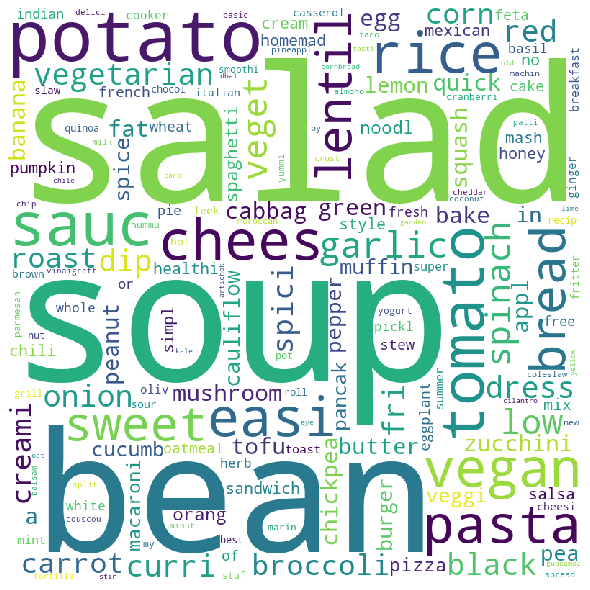

In [124]:
low_size = df_ing[df_ing.avg_rating <= 4].shape[0]
lo_low = generate_wordcloud(df_ing[df_ing.avg_rating <= 4].name, irr)

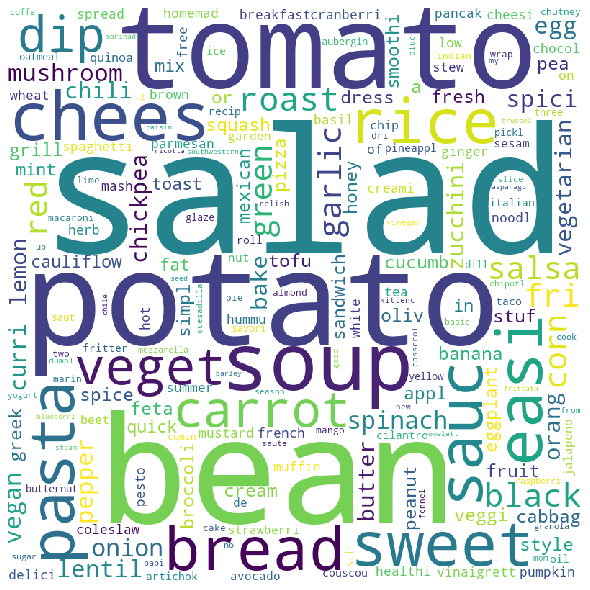

In [125]:
high_size = df_ing[df_ing.avg_rating == 5].shape[0]
lo_high = generate_wordcloud(df_ing[df_ing.avg_rating == 5].name, irr)

In [126]:
set(list(lo_low.keys()) + list(lo_high.keys()))

{'beaten',
 'wedg',
 'tuna',
 'gun',
 'mein',
 'cassi',
 'tea',
 'sumac',
 'cumin',
 'sham',
 'refrito',
 'broodj',
 'moosewood',
 'ever',
 'saltado',
 'mologut',
 'kalamata',
 'sandwich',
 'omelet',
 'okonomiyaki',
 'giardiniera',
 'mayonnais',
 'bishop',
 'fieri',
 'alentejo',
 'anytim',
 'pol',
 'hommu',
 'uber',
 'welsh',
 'drew',
 'peasant',
 'claw',
 'papa',
 'pig',
 'fettuccini',
 'cola',
 'jelli',
 'among',
 'tropic',
 'stix',
 'homini',
 'marocain',
 'pita',
 'aluminium',
 'hashbrown',
 'pleas',
 'couscou',
 'tzatziki',
 'coconut',
 'that',
 'pimenton',
 'yachni',
 'parti',
 'anoth',
 'slice',
 'outer',
 'sarda',
 'ragot',
 'creol',
 'triangl',
 'go',
 'morrocan',
 'yuca',
 'veganis',
 'hard',
 'parmigiano',
 'seed',
 'guacamol',
 'bulghur',
 'poach',
 'mamma',
 'todd',
 'refriger',
 'burn',
 'ovaltin',
 'havarti',
 'benefici',
 'ensalada',
 'color',
 'mom',
 'popper',
 'zuppa',
 'fri',
 'ball',
 'ramadan',
 'tvp',
 '101',
 '1927',
 'lablabi',
 'grown',
 'dip',
 'milk',
 'fatt

In [127]:
# Difference between average in high and average in low
lo_diff = {k: lo_high.get(k, 0)/high_size - lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [128]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [129]:
lo_diff

{'soup': -0.030334648043574275,
 'sauc': -0.020179698617670355,
 'vegan': -0.018290011657825758,
 'low': -0.01640032469798116,
 'creami': -0.012051547699546908,
 'burger': -0.011893479264609458,
 'lentil': -0.011291526127330032,
 'rice': -0.01074999124938495,
 'broccoli': -0.010057299250300808,
 'tofu': -0.008669685796068532,
 'quick': -0.008669685796068532,
 'fat': -0.008560442448932636,
 'dress': -0.008390780842462399,
 'macaroni': -0.00820016234899058,
 'no': -0.008090919001854685,
 'curri': -0.007970082483185998,
 'muffin': -0.0076864956718454705,
 'easi': -0.0068381876394942795,
 'banana': -0.006566193999686538,
 'vegetarian': -0.005975834033939902,
 'whole': -0.005643422134797818,
 'yummi': -0.005517903758394739,
 'peanut': -0.0054900355575947645,
 'cooker': -0.005424935440526026,
 'pasta': -0.0053413308381261015,
 'super': -0.005113480428385524,
 'cake': -0.005020512110516813,
 'chees': -0.004969457566651257,
 'in': -0.004850850504046574,
 'garlic': -0.004746289014645074,
 'oatm

In [130]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [131]:
lo_diff2

{'salad': 0.018231599908949014,
 'salsa': 0.014113125721925742,
 'greek': 0.009861998899094596,
 'tomato': 0.009159943184541663,
 'fruit': 0.008490660474129504,
 'grill': 0.008365142097726423,
 'tea': 0.007556295437707995,
 'carrot': 0.006349936761478745,
 'pepper': 0.006087306837139797,
 'roast': 0.005929238402202348,
 'jalapeno': 0.005780533682733687,
 'ice': 0.005359835323457289,
 'fresh': 0.00529473520638855,
 'mustard': 0.004922861934913706,
 'vinaigrett': 0.004797343558510625,
 'saute': 0.004627681952040387,
 'stuf': 0.004578856864238833,
 'smoothi': 0.004578856864238833,
 'oliv': 0.004251126822831146,
 'eggplant': 0.004234851793563961,
 'chili': 0.004218576764296779,
 'strawberri': 0.0041907085634968035,
 'orang': 0.00410933341716088,
 'coffe': 0.004097740245628092,
 'beet': 0.004081465216360908,
 'or': 0.00392339678142346,
 'dip': 0.003809471576553168,
 'green': 0.003732778287951641,
 'kittenc': 0.0036770418863516932,
 'de': 0.003660766857084509,
 'babi': 0.003567798539215798,


# Most controversial ingredient (STD per ingredient)

In [148]:
df_con = df.copy()
df_con['ing_text'] = df_con.ingredients.apply(lambda x: ' '.join(['_'.join(ing.split(' ')) for ing in x]))

In [149]:
desc = df_con.std_rating.describe()
desc

count    156948.000000
mean          0.446846
std           0.764981
min           0.000000
25%           0.000000
50%           0.000000
75%           0.577350
max           3.535534
Name: std_rating, dtype: float64

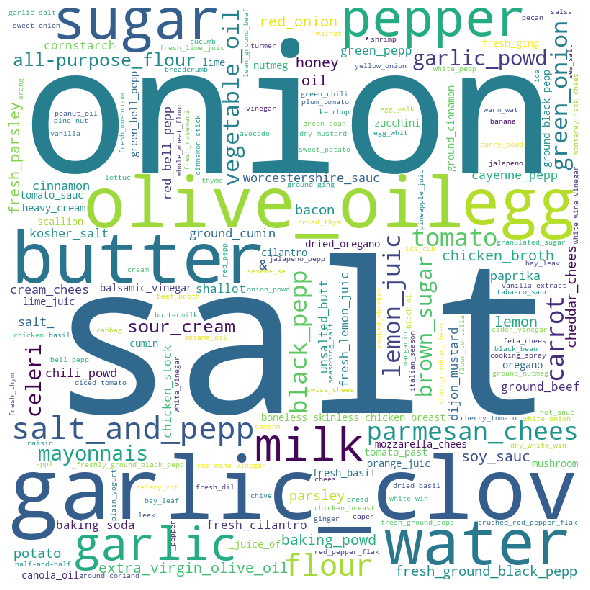

In [150]:
low_size = df_con[df_con.std_rating <= desc['mean']].shape[0]
lo_low = generate_wordcloud(df_con[df_con.std_rating <= desc['mean']].ing_text, irr)

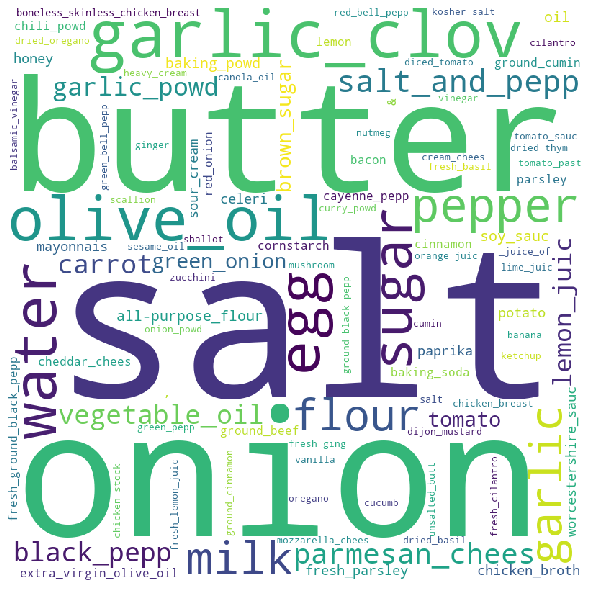

In [151]:
high_size = df_con[df_con.std_rating >= desc['75%']].shape[0]
lo_high = generate_wordcloud(df_con[df_con.std_rating >= desc['75%']].ing_text, irr)

In [152]:
set(list(lo_low.keys()) + list(lo_high.keys()))

{'fresh_cream',
 'cooked_soba_noodl',
 'kitchen_bouquet',
 'cheez-it_crack',
 'tomato-flavored_bouillon_cub',
 'fresh_red_raspberri',
 "hunt's_tomato_sauce-no_salt_ad",
 'petroleum_jelli',
 'diced_green_chili',
 'chestnut_flour',
 'light_mozzarella_chees',
 'yogurt-covered_peanut',
 'japanese_roasted_nori',
 'starkist_lemon_and_cracked_pepper_tuna_fillet',
 'fat_free_greek_yogurt',
 'tea',
 'fully_cooked_frozen_seasoned_steak_strip',
 'basil_oil',
 'kirby_cucumb',
 'parsley_flak',
 'monarch_151_rum',
 'italian_herb_season',
 'black_bean_soup',
 'crocodile_filet',
 'ruby_port',
 'fiesta_nacho_cheese_soup',
 'fruit_bit',
 'light_rum',
 'frozen_broccoli_carrots_cauliflower_mix',
 'giardiniera',
 'kraft_shredded_mild_cheddar_chees',
 'small_elbow_macaroni',
 'pomelo_fruit',
 'butter_bean',
 'toasted_sesame_oil',
 'raccoon',
 'chef_boyardee_spaghetti_',
 'mixed_green',
 'green_pickled_jalapeno_pepp',
 'quorn_minc',
 'breasts_of_v',
 'white_macon_win',
 'strawberry_banana_nectar',
 'fat-free

In [158]:
# Difference between average in high and average in low
lo_diff = {k: - lo_high.get(k, 0)/high_size + lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [159]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [160]:
lo_diff

{'salt': -0.03665620224514138,
 'water': -0.025807490277174633,
 'flour': -0.020347149163066805,
 'onion': -0.01791343298641057,
 'garlic': -0.017699868070250493,
 'egg': -0.01721000065645445,
 'milk': -0.017170294869012434,
 'baking_powd': -0.014739639260688456,
 'butter': -0.01464355968931122,
 'garlic_powd': -0.01275740296077714,
 'sugar': -0.011751956789087803,
 'paprika': -0.010188468347931176,
 'vegetable_oil': -0.00980834704611979,
 'oil': -0.009416929912649148,
 'soy_sauc': -0.009300873975357518,
 'cornstarch': -0.009153335091770121,
 'all-purpose_flour': -0.00801900986542118,
 'boneless_skinless_chicken_breast': -0.006608437612898685,
 'baking_soda': -0.0064322880910563825,
 'parmesan_chees': -0.005914178849269092,
 'chicken_broth': -0.005826856486986928,
 'brown_sugar': -0.005307262366245999,
 'cayenne_pepp': -0.00525338544064646,
 'black_pepp': -0.005205316741261207,
 'cinnamon': -0.004897400221904741,
 'salt_and_pepp': -0.0048450844217477335,
 'potato': -0.00447525596758582

In [161]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [162]:
lo_diff2

{'garlic_clov': 0.01546793008777897,
 'red_onion': 0.009171897470831504,
 'olive_oil': 0.0087272435824223,
 'tomato': 0.0072356204555045975,
 'extra_virgin_olive_oil': 0.006688940197935547,
 'shallot': 0.0064234803365360756,
 'kosher_salt': 0.00562368593767781,
 'fresh_ground_black_pepp': 0.005477877806553184,
 'avocado': 0.005174375016531271,
 'bacon': 0.004377258025981011,
 'orange_juic': 0.004338997495019484,
 'cream_chees': 0.0041253659702693846,
 'unsalted_butt': 0.0036833751404076152,
 'red_bell_pepp': 0.0035486184666618306,
 'lime': 0.0035060656438915955,
 'strawberri': 0.0033276032404943685,
 'lime_juic': 0.003297507723285825,
 'ice': 0.0032644437332231937,
 'orang': 0.003228692482778151,
 'sea_salt': 0.003115993532753108,
 'cherry_tomato': 0.0030058066475264463,
 'lemon': 0.0029243674728942765,
 'dijon_mustard': 0.002875581071305991,
 'black_ol': 0.0028632254991213333,
 'fresh_cilantro': 0.0028561512813456875,
 'red_wine_vinegar': 0.002740957186389177,
 'walnut': 0.00263376982

# BULLSHIT

In [ ]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_interesting = df.loc[index]

In [ ]:
tags = [j for i in df_interesting.tags for j in i]

In [ ]:
tags_dict = Counter(tags)

In [ ]:
tags_dict.most_common(50)

In [ ]:
df_interesting

In [ ]:
df_ing[(df_ing.onion == 1) & (df_ing.submitted == np.datetime64('2002'))].shape[0] / df[df.submitted.astype('datetime64[Y]') == np.datetime64('2002')].shape[0]

In [ ]:
total_dict

In [ ]:
df[df.submitted.astype('datetime64[Y]') == np.datetime64('2018')].shape[0]